In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
observations = pd.read_csv("biodiversity_observations.csv")
species = pd.read_csv("biodiversity_species_info.csv")

In [3]:
#observations
print(observations.info())
print(observations.describe(include = "all"))
print(observations.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
             scientific_name                  park_name  observations
count                  23296                      23296  23296.000000
unique                  5541                          4           NaN
top     Hypochaeris radicata  Yellowstone National Park           NaN
freq                      12                       5824           NaN
mean                     NaN                        NaN    142.287904
std                      NaN                        NaN     69.890532
min                      NaN                        NaN      9.000000
25%                      NaN                      

In [4]:
observations = observations.groupby(["scientific_name", "park_name"]).observations.sum().reset_index()
print(observations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22164 entries, 0 to 22163
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  22164 non-null  object
 1   park_name        22164 non-null  object
 2   observations     22164 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 519.6+ KB
None


In [5]:
#species
print(species.info())
print(species.describe(include = "all"))
print(species.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None
              category scientific_name        common_names conservation_status
count             5824            5824                5824                 191
unique               7            5541                5504                   4
top     Vascular Plant   Puma concolor  Brachythecium Moss  Species of Concern
freq              4470               3                   7                 161
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal             

In [6]:
print(species.scientific_name.value_counts())
#seeing an example
print(species[species.scientific_name == "Hypochaeris radicata"])

Puma concolor                           3
Myotis lucifugus                        3
Columba livia                           3
Hypochaeris radicata                    3
Procyon lotor                           3
                                       ..
Allium obtusum                          1
Trisetum spicatum                       1
Ranunculus alismifolius var. davisii    1
Blasia pusilla                          1
Chamaea fasciata                        1
Name: scientific_name, Length: 5541, dtype: int64
            category       scientific_name  \
858   Vascular Plant  Hypochaeris radicata   
3488  Vascular Plant  Hypochaeris radicata   
4799  Vascular Plant  Hypochaeris radicata   

                                           common_names conservation_status  
858                        Cat's Ear, Spotted Cat's-Ear                 NaN  
3488          Spotted Cats-Ear, Hairy Cats-Ear, Gosmore                 NaN  
4799  Common Cat's-Ear, False Dandelion, Frogbit, Go...              

In [7]:
#checking to see if duplicates only comes from common_names
species_no_common_names = species.drop(labels = "common_names", axis = 1)
species_no_common_names = species_no_common_names.drop_duplicates()
print(species_no_common_names.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5543 entries, 0 to 5823
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5543 non-null   object
 1   scientific_name      5543 non-null   object
 2   conservation_status  180 non-null    object
dtypes: object(3)
memory usage: 173.2+ KB
None


In [8]:
print(species_no_common_names.scientific_name.value_counts())

Canis lupus                              2
Oncorhynchus mykiss                      2
Desmodium canescens                      1
Galactia volubilis                       1
Rorippa islandica                        1
                                        ..
Carphophis                               1
Potamogeton pusillus var. tenuissimus    1
Abies bifolia                            1
Verbena hastata                          1
Chamaea fasciata                         1
Name: scientific_name, Length: 5541, dtype: int64


In [9]:
print(species_no_common_names[species_no_common_names.scientific_name == "Canis lupus"])
print(species_no_common_names[species_no_common_names.scientific_name == "Oncorhynchus mykiss"])

     category scientific_name conservation_status
8      Mammal     Canis lupus          Endangered
3020   Mammal     Canis lupus         In Recovery
     category      scientific_name conservation_status
560      Fish  Oncorhynchus mykiss                 NaN
3283     Fish  Oncorhynchus mykiss          Threatened


In [10]:
species_no_common_names = species_no_common_names.drop(labels = [8, 560], axis = 0)
print(species_no_common_names.info())
print(species_no_common_names[species_no_common_names.scientific_name == "Canis lupus"])
print(species_no_common_names[species_no_common_names.scientific_name == "Oncorhynchus mykiss"])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   conservation_status  179 non-null    object
dtypes: object(3)
memory usage: 173.2+ KB
None
     category scientific_name conservation_status
3020   Mammal     Canis lupus         In Recovery
     category      scientific_name conservation_status
3283     Fish  Oncorhynchus mykiss          Threatened


In [11]:
observations_species = pd.merge(species_no_common_names,observations, how = 'right')
print(observations_species.head())

         category scientific_name conservation_status  \
0  Vascular Plant   Abies bifolia                 NaN   
1  Vascular Plant   Abies bifolia                 NaN   
2  Vascular Plant   Abies bifolia                 NaN   
3  Vascular Plant   Abies bifolia                 NaN   
4  Vascular Plant  Abies concolor                 NaN   

                             park_name  observations  
0                  Bryce National Park           109  
1  Great Smoky Mountains National Park            72  
2            Yellowstone National Park           215  
3               Yosemite National Park           136  
4                  Bryce National Park            83  


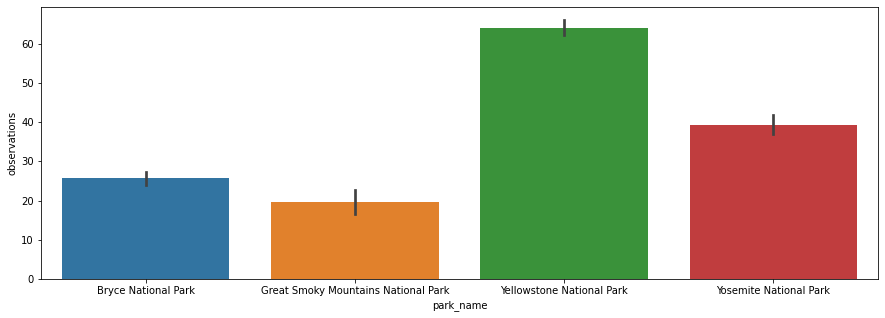

In [23]:
# Which park has the most observations of endangered species?
plt.figure(figsize = (15,5))
sns.barplot(data = observations_species[observations_species.conservation_status == 'Endangered']
            , x= 'park_name', y = 'observations')
plt.show()

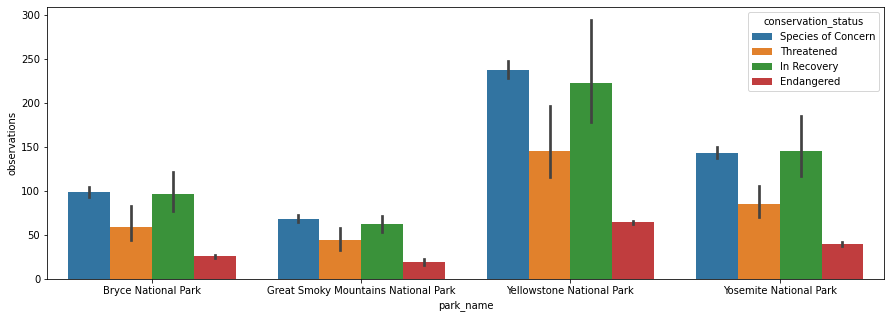

In [26]:
plt.figure(figsize = (15,5))
sns.barplot(data = observations_species
            , x= 'park_name', y = 'observations', hue = 'conservation_status')
plt.show()

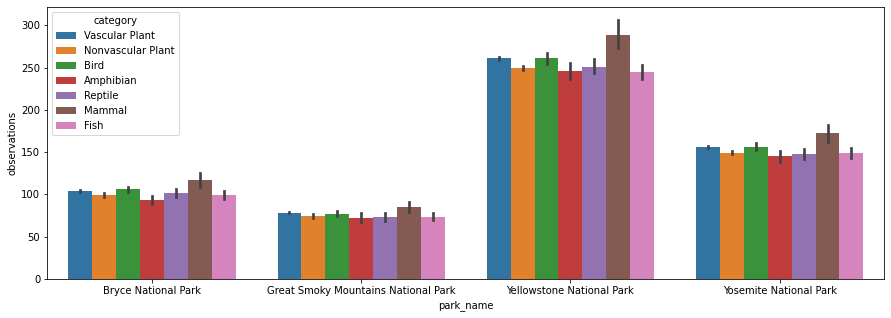

In [27]:
# Which park has the most observations of mammals?
plt.figure(figsize = (15,5))
sns.barplot(data = observations_species
            , x= 'park_name', y = 'observations', hue = 'category')
plt.show()

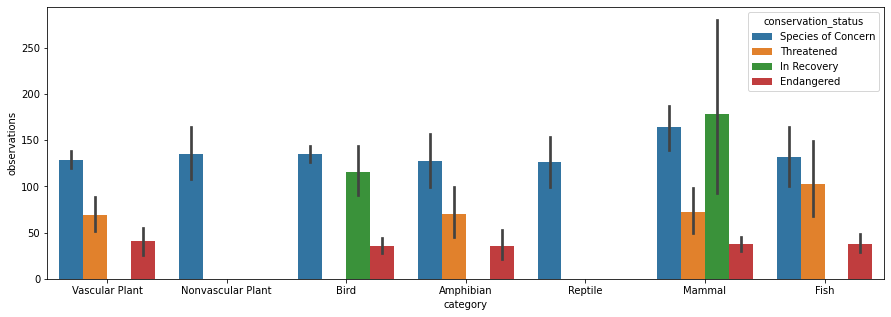

In [38]:
# Which category of the species has the most observations in recovery status?
plt.figure(figsize = (15,5))
sns.barplot(data = observations_species
            , x= 'category', y = 'observations', hue = 'conservation_status')
plt.show()

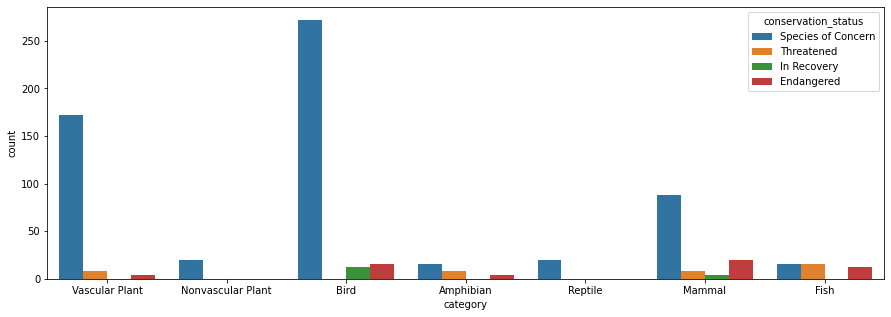

In [39]:
plt.figure(figsize = (15,5))
sns.countplot(data = observations_species
            , x= 'category', hue = 'conservation_status')
plt.show()

In [37]:
pd.crosstab(observations_species.category, observations_species.conservation_status)

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,4,0,16,8
Bird,16,12,272,0
Fish,12,0,16,16
Mammal,20,4,88,8
Nonvascular Plant,0,0,20,0
Reptile,0,0,20,0
Vascular Plant,4,0,172,8
